# STEPS TO BE DONE BY KK!!!
1. Lemmatization, 
2. BoW or TFIDF(with ngram), 
3. Train Model 
4. Include POS 
5. Train Model 
6. sparse sentence 
7. Trainmodel

In [25]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:

# Download stopwords from nltk
nltk.download('stopwords')

# Load dataset
# Try loading the file with tab delimiter
#df = pd.read_csv('../training_data_lowercase.csv', sep='\t',header=None, names=['label', 'text'])
df_real = pd.read_csv('testing_data_lowercase.csv', sep='\t',header=None, names=['label', 'text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print(df.shape)
print(df.columns)
print(df.head())

(34152, 2)
Index(['label', 'text'], dtype='object')
   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


In [33]:

# Check and clean dataset
#df.dropna(subset=['text', 'label'], inplace=True)
df_real.dropna(subset=['text', 'label'], inplace=True)

# Preprocess text (lowercasing, removing punctuation, and stopwords)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    #stop_words = set(stopwords.words('spanish'))  # Assuming Spanish text
    stop_words = set(stopwords.words('english'))  # English text
    return ' '.join([word for word in text.split() if word not in stop_words])

#df['cleaned_text'] = df['text'].apply(preprocess_text)
df_real['cleaned_text'] = df_real['text'].apply(preprocess_text)
print(df_real['cleaned_text'])
df_real['cleaned_text'].shape

0                 democrats wont chance 2018 unless start
1       southside chicago blacks fight liberal elites ...
2       wife lions quarterback matthew stafford sent b...
3       hey cnnremember obamas notorious friday night ...
4       breaking news sebastian gorka outare ivanka ja...
                              ...                        
9979    fully committed nato backs new us approach afg...
9980      lexisnexis withdrew two products chinese market
9981               minsk cultural hub becomes authorities
9982    vatican upbeat possibility pope francis visiti...
9983         indonesia buy 114 billion worth russian jets
Name: cleaned_text, Length: 9984, dtype: object


(9984,)

In [34]:
# LEMMATIZATION STEPS
# Download required NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional for better support
nltk.download('punkt')     # Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagging to help lemmatization

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0]  # Get the first character of the POS tag
    tag_dict = {"J": wordnet.ADJ,   # Adjective
                "N": wordnet.NOUN,  # Noun
                "V": wordnet.VERB,  # Verb
                "R": wordnet.ADV}   # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN if no match
    
# Function to lemmatize text with POS tagging
def lemmatize_text(text):
    # Lemmatize each word in the text using the POS tags
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return lemmatized_text

# Lemmatizing the input DS
#df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
df_real['cleaned_text'] = df_real['cleaned_text'].apply(lemmatize_text)

print(df['cleaned_text'])
df['cleaned_text'].shape


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obamas name coded website ...
4        pope francis called donald trump christmas speech
                               ...                        
34147              tear rain thai gather late king funeral
34148    pyongyang university need nonus teacher travel...
34149    philippine president duterte visit japan ahead...
34150             japan abe may election many dont want pm
34151    demoralized divided inside catalonia police force
Name: cleaned_text, Length: 34152, dtype: object


(34152,)

Bag of Words (BOW) Performance:
Confusion Matrix:
[[4200  220]
 [ 280 3838]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4420
           1       0.95      0.93      0.94      4118

    accuracy                           0.94      8538
   macro avg       0.94      0.94      0.94      8538
weighted avg       0.94      0.94      0.94      8538



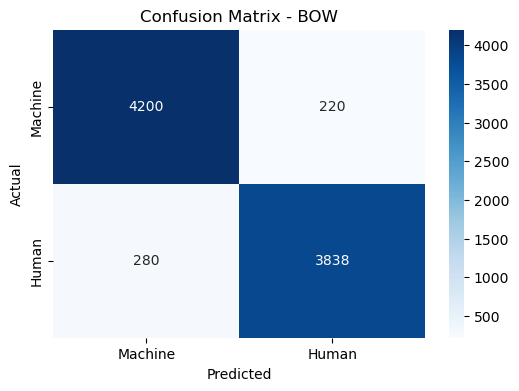


TF-IDF Performance:
Confusion Matrix:
[[4187  233]
 [ 292 3826]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4420
           1       0.94      0.93      0.94      4118

    accuracy                           0.94      8538
   macro avg       0.94      0.94      0.94      8538
weighted avg       0.94      0.94      0.94      8538



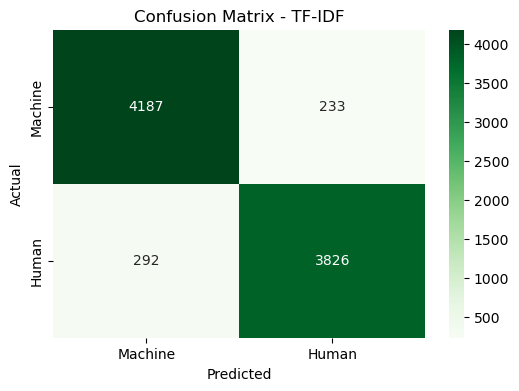

In [31]:
# PERFORM BoW and TF-IDF with Naive Bayes

from sklearn.feature_extraction.text import CountVectorizer

# lemmatized text is in 'df['cleaned_text']' and labels are in 'df['label']'

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.25, random_state=42)

# BOW VECTORIZER WITH NAIVE BAYES

# Step 2: Vectorize the text with Bag of Words (BOW) and n-grams
bow_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Bigrams (1-grams and 2-grams)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Step 3: Train a Naive Bayes classifier for BOW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

# TFIDF VECTORIZER WITH NAIVE BAYES


# Step 4: Vectorize the text with TF-IDF and n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Bigrams (1-grams and 2-grams)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

# Step 5: Train a Naive Bayes classifier for TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Step 6: Predict with both models
y_pred_bow = nb_bow.predict(X_test_bow)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Step 7: Evaluate the models using confusion matrix and classification report

# Confusion matrix and classification report for BOW
print("Bag of Words (BOW) Performance:")
print("Confusion Matrix:")
cm_bow = confusion_matrix(y_test, y_pred_bow)
print(cm_bow)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))

# Plot confusion matrix for BOW
plt.figure(figsize=(6,4))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.title('Confusion Matrix - BOW')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix and classification report for TF-IDF
print("\nTF-IDF Performance:")
print("Confusion Matrix:")
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print(cm_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))

# Plot confusion matrix for TF-IDF
plt.figure(figsize=(6,4))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.title('Confusion Matrix - TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

X_real_bow = bow_vectorizer.transform(df['cleaned text'])
X_real_tfidf = tfidf_vectorizer.transform(df['cleaned text'])

y_real_bow = nb_bow.predict(X_real_bow)
y_real_tfidf = nb_tfidf.predict(X_real_tfidf)

Real Dataset - Bag of Words (BoW) Performance:
Confusion Matrix:
[[4692  455]
 [ 194 4643]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      5147
           1       0.91      0.96      0.93      4837

    accuracy                           0.93      9984
   macro avg       0.94      0.94      0.93      9984
weighted avg       0.94      0.93      0.94      9984



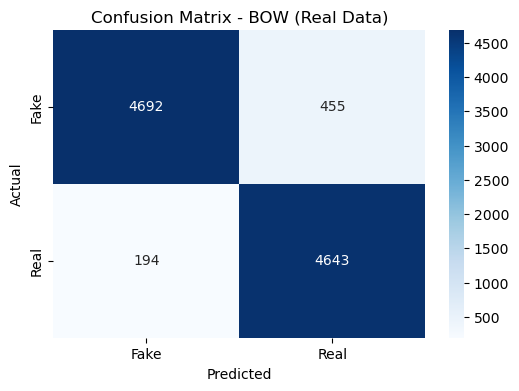


Real Dataset - TF-IDF Performance:
Confusion Matrix:
[[4689  458]
 [ 222 4615]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5147
           1       0.91      0.95      0.93      4837

    accuracy                           0.93      9984
   macro avg       0.93      0.93      0.93      9984
weighted avg       0.93      0.93      0.93      9984



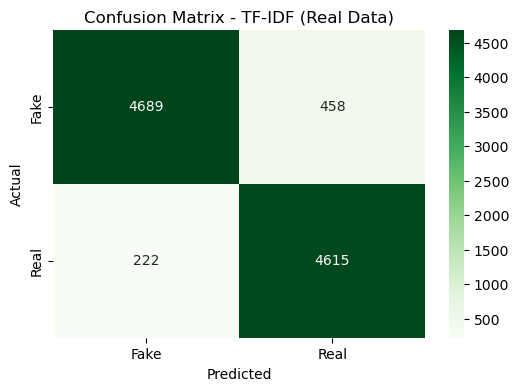

In [35]:
# Assuming the Real dataset is loaded into a dataframe `df_real`
# and it contains a 'cleaned_text' column for text and 'label' column for actual labels

# Step 1: Vectorize the Real dataset using the fitted vectorizers
X_real_bow = bow_vectorizer.transform(df_real['cleaned_text'])  # Transform using BoW vectorizer
X_real_tfidf = tfidf_vectorizer.transform(df_real['cleaned_text'])  # Transform using TF-IDF vectorizer

# Step 2: Predict the labels using the trained Naive Bayes models
y_pred_real_bow = nb_bow.predict(X_real_bow)  # Predict using BoW model
y_pred_real_tfidf = nb_tfidf.predict(X_real_tfidf)  # Predict using TF-IDF model

# Step 3: Compare with the actual labels
y_actual_real = df_real['label']  # Actual labels

# Step 4: Evaluate the performance using confusion matrix and classification report

# Evaluate BoW predictions
print("Real Dataset - Bag of Words (BoW) Performance:")
print("Confusion Matrix:")
cm_real_bow = confusion_matrix(y_actual_real, y_pred_real_bow)
print(cm_real_bow)
print("\nClassification Report:")
print(classification_report(y_actual_real, y_pred_real_bow))

# Plot confusion matrix for BoW on Real dataset
plt.figure(figsize=(6,4))
sns.heatmap(cm_real_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - BOW (Real Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate TF-IDF predictions
print("\nReal Dataset - TF-IDF Performance:")
print("Confusion Matrix:")
cm_real_tfidf = confusion_matrix(y_actual_real, y_pred_real_tfidf)
print(cm_real_tfidf)
print("\nClassification Report:")
print(classification_report(y_actual_real, y_pred_real_tfidf))

# Plot confusion matrix for TF-IDF on Real dataset
plt.figure(figsize=(6,4))
sns.heatmap(cm_real_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - TF-IDF (Real Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
